# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CAP+Project+2+-+corona_tested_006.zip to CAP+Project+2+-+corona_tested_006.zip


In [ ]:
from zipfile import ZipFile

with ZipFile('CAP+Project+2+-+corona_tested_006.zip', 'r') as zipfile:
    zipfile.extractall('dataset')

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

In [ ]:
# read data
corona = pd.read_csv("/content/dataset/corona_tested_006.csv", low_memory=False)
corona.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
# shape of dataset
corona.shape

(278848, 11)

In [ ]:
# rename columns head to small letters
corona.rename(columns={'Ind_ID':'ind_id',
                       'Test_date':'test_date',
                       'Cough_symptoms': 'cough_symptoms',
                       'Fever': 'fever',
                       'Sore_throat':'sore_throat',
                       'Shortness_of_breath': 'shortness_of_breath',
                       'Headache': 'headache',
                       'Corona':'corona',
                       'Age_60_above':'age_60_above',
                       'Sex':'sex',
                       'Known_contact':'known_contact'
                       }, inplace=True)
corona.columns

Index(['ind_id', 'test_date', 'cough_symptoms', 'fever', 'sore_throat',
       'shortness_of_breath', 'headache', 'corona', 'age_60_above', 'sex',
       'known_contact'],
      dtype='object')

In [ ]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ind_id               278848 non-null  int64 
 1   test_date            278848 non-null  object
 2   cough_symptoms       278848 non-null  object
 3   fever                278848 non-null  object
 4   sore_throat          278848 non-null  object
 5   shortness_of_breath  278848 non-null  object
 6   headache             278848 non-null  object
 7   corona               278848 non-null  object
 8   age_60_above         278848 non-null  object
 9   sex                  278848 non-null  object
 10  known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
# finding the total number of missing values in dataset per variables
for cols in corona.columns:
    try:
        print(f"{cols} \t\t : {round(((corona[cols].value_counts()['None'])/len(corona))*100, 4)} (%)")
    except:
        continue

cough_symptoms 		 : 0.0904 (%)
fever 		 : 0.0904 (%)
sore_throat 		 : 0.0004 (%)
shortness_of_breath 		 : 0.0004 (%)
headache 		 : 0.0004 (%)
age_60_above 		 : 45.6593 (%)
sex 		 : 7.0157 (%)


**age_60_above has more than 30% missing value so dropping the whole column would be a better option. Then replacing the missing values of other columns with the mode.**

In [ ]:
corona['corona'].value_counts()/len(corona)*100

negative    93.322168
positive     5.282089
other        1.395742
Name: corona, dtype: float64

 **This is an imbalanced dataset, where positive values are very less compaired to negative class.**

# Exploratory Data Analysis

## Univarent analysis

In [ ]:
# catgorical columns
cat_columns = list(corona.columns)
cat_columns.remove('ind_id')
cat_columns.remove('test_date')

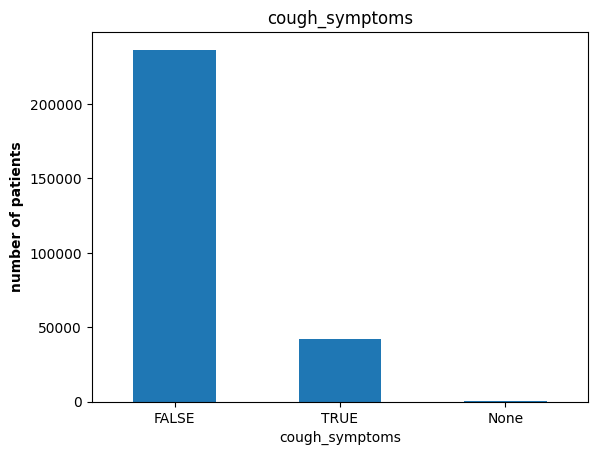

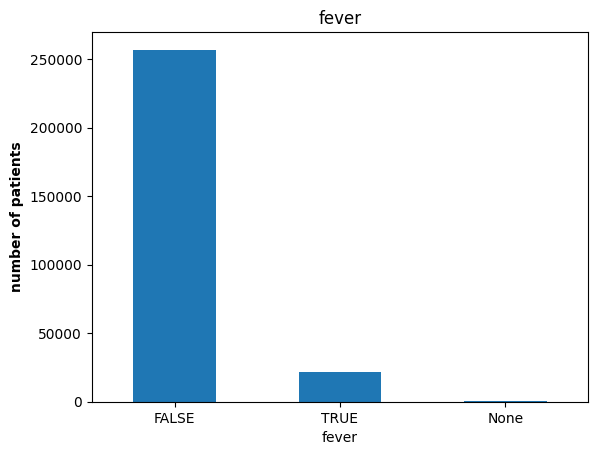

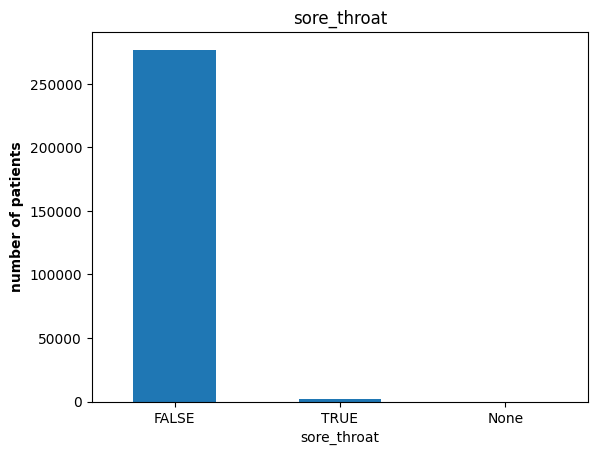

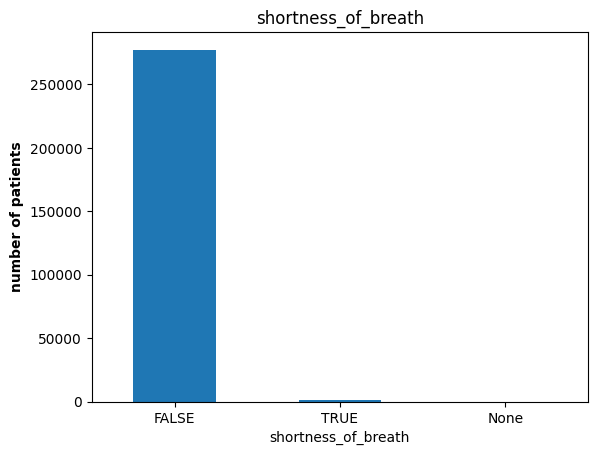

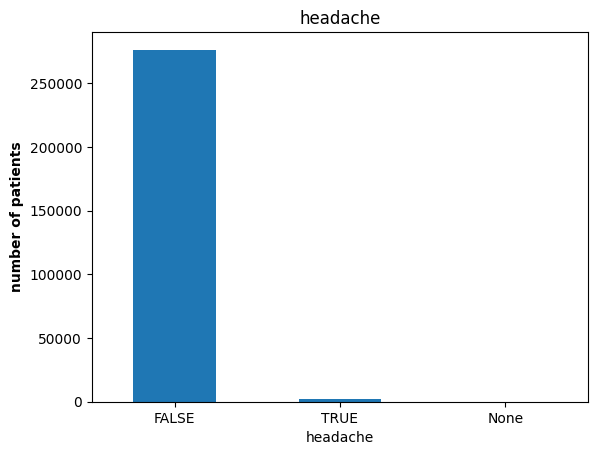

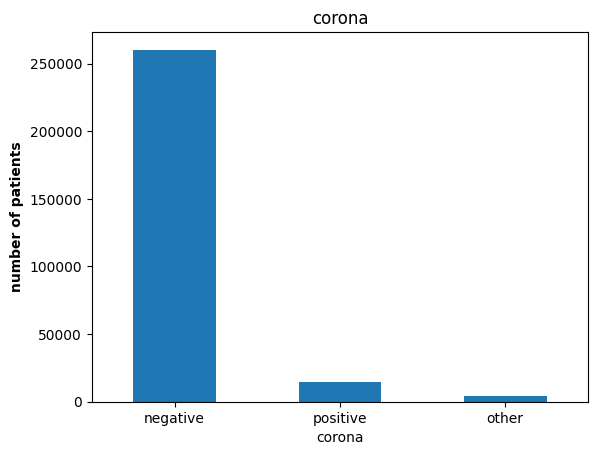

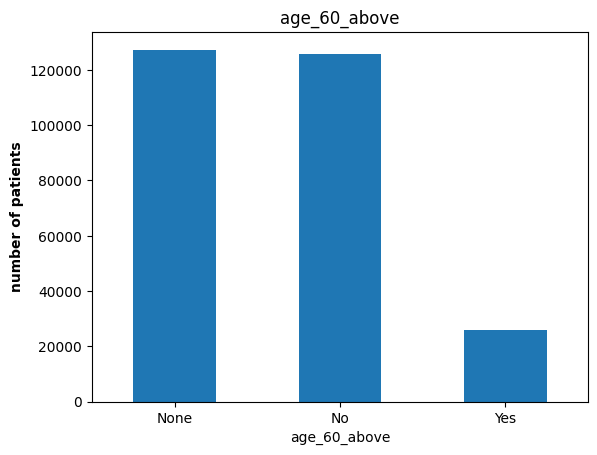

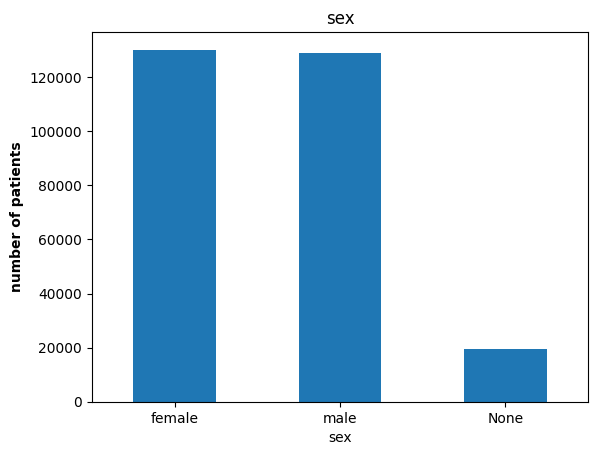

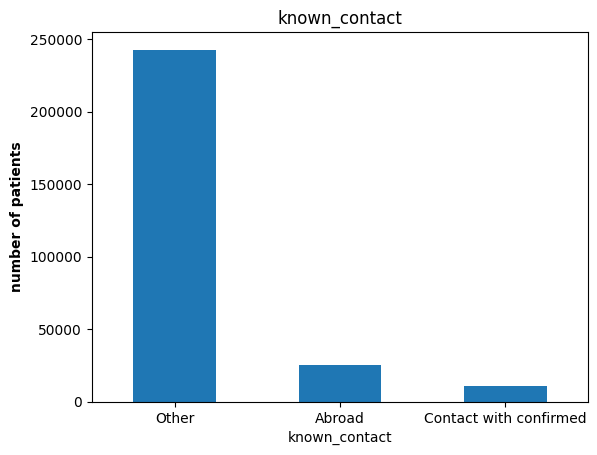

In [ ]:
# visualise data
for col in cat_columns:
    plt.figure()
    corona[col].value_counts().plot(kind="bar")
    plt.xlabel(col)
    plt.ylabel("number of patients", fontweight='bold')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

*   **Dataset contains missing values**
*   **test_date is of object data type needs to be converted.**
*  **Dataset have imbalance class, where negative contains more than 90% of samples.**
*  **Considering covid positive or negative outcome only, the other samples can be neglected.**
*  **age_60_above column contains more than 30% of missing value so droping the column.**
*   **missing valus can be dropped.**


## Bivarient Analysis

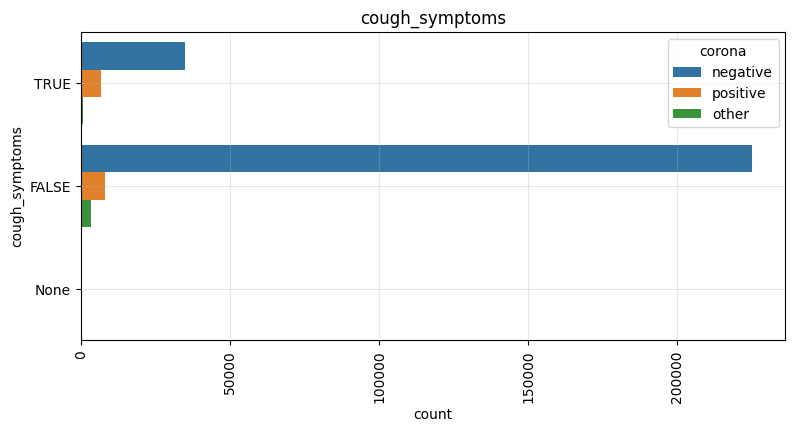

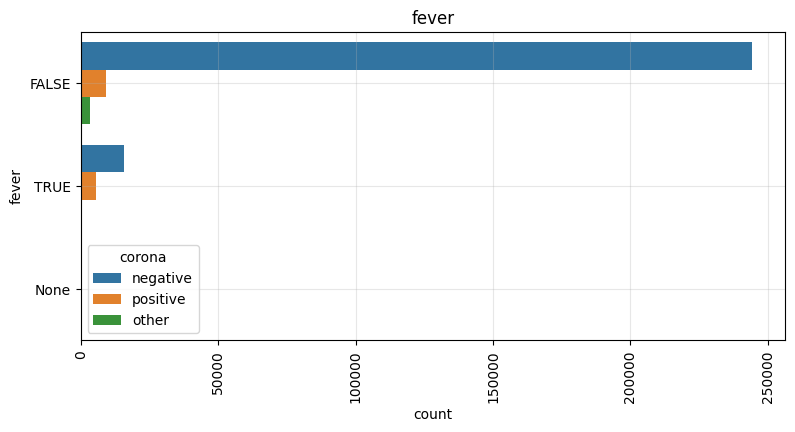

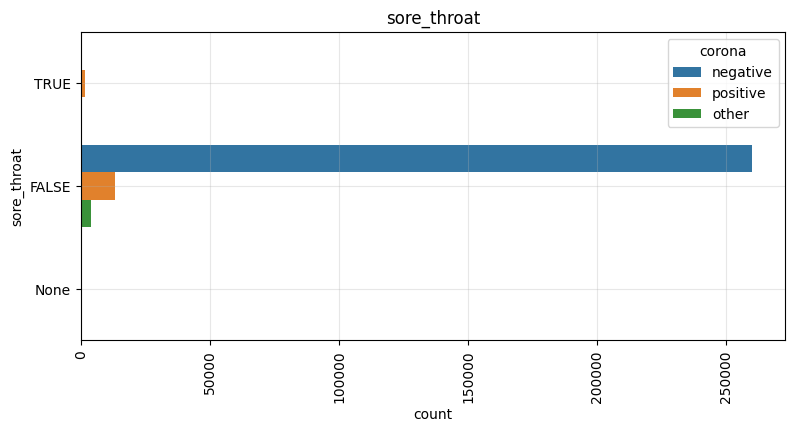

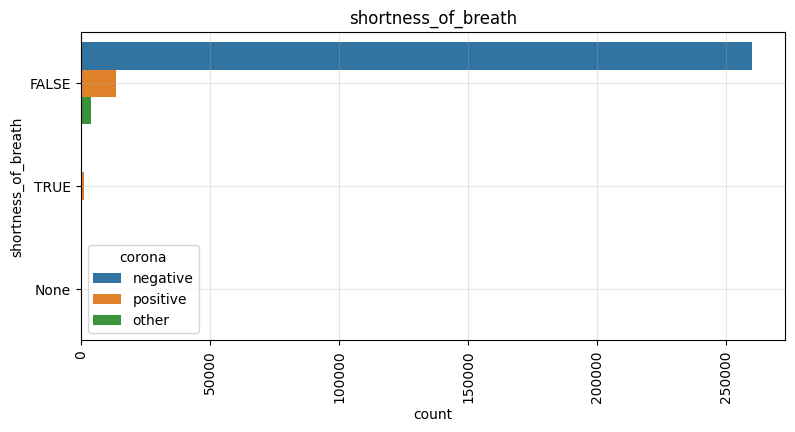

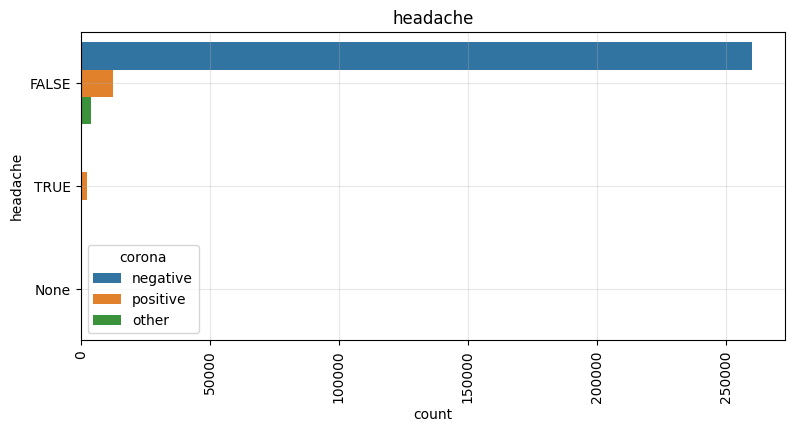

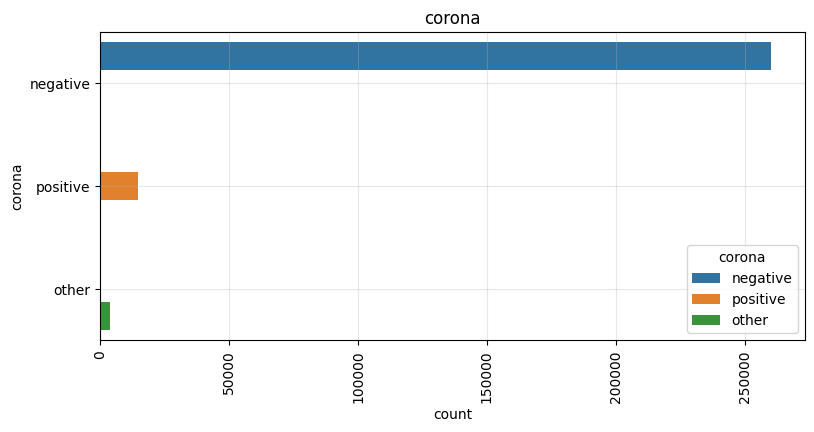

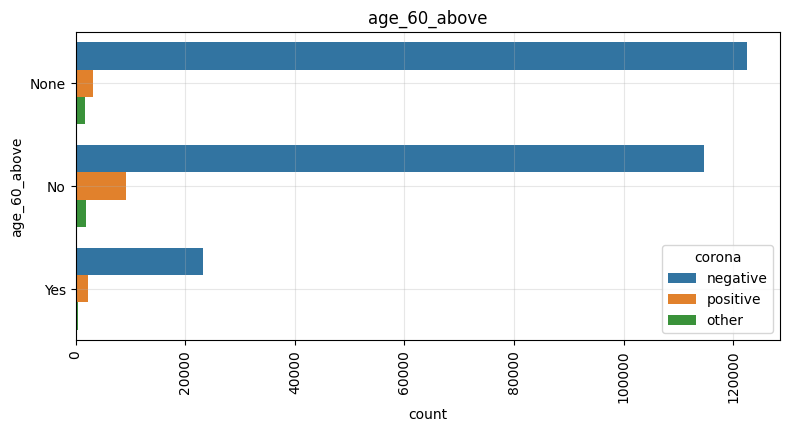

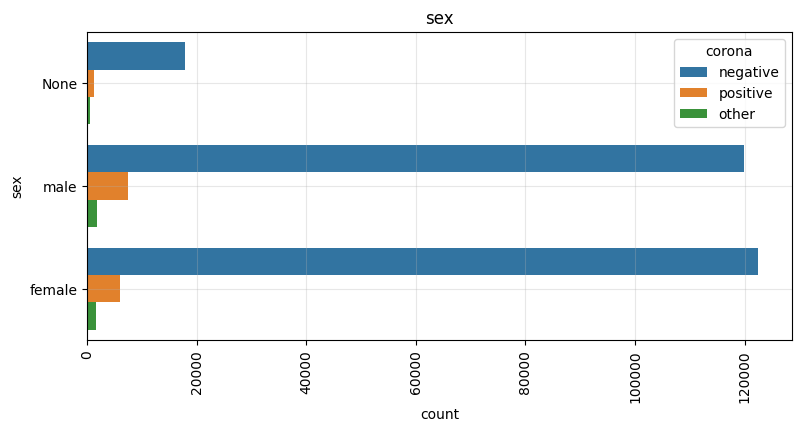

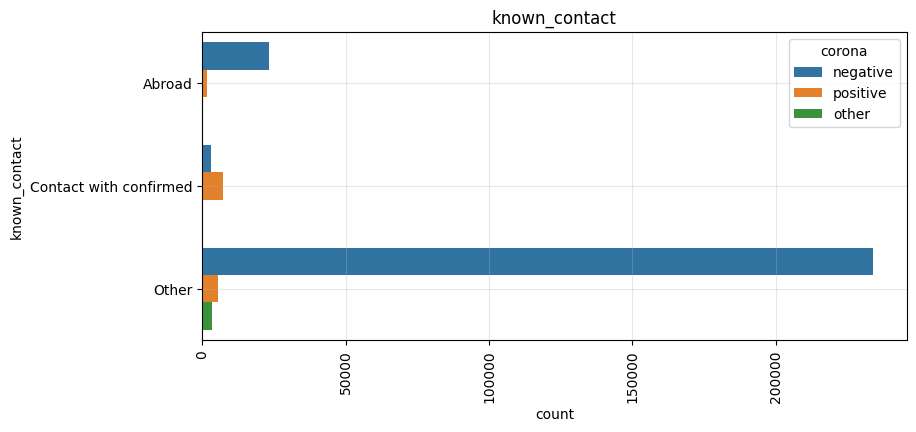

In [ ]:
# performing bivariant analysis before data cleaning
for column in cat_columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(y=corona[column], hue=corona["corona"])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.show()

**The analysing of imbalanced dataset can affect the outcome so known_contact variable is highly corelated with the target variable.**

# Data Cleaning


In [ ]:
# preprocess
clean_corona = corona.copy()
columns_to_drop= ["ind_id", "test_date", "age_60_above"]
clean_corona.drop(columns_to_drop, axis=1, inplace=True)

**dropping ind_id, test_date which won't be necessary for model training and prediction. age_60_above contains too much missing values so dropping the column.**

In [ ]:
# replacing values with mode
missing_columns = ["cough_symptoms", "fever", "sore_throat", "shortness_of_breath", "headache", "sex"]

def replace_missing_value_with_mode(s):
    return s.replace('None', s.mode()[0])

for col in missing_columns:
    clean_corona[col] = replace_missing_value_with_mode(clean_corona[col])

clean_corona.head(4)

,cough_symptoms,fever,sore_throat,shortness_of_breath,headache,corona,sex,known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,female,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,female,Abroad
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,female,Abroad
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative,female,Abroad


**replacing all missing values iwth respective mode**

In [ ]:
for col in clean_corona:
    clean_corona[col] = clean_corona[col].apply(lambda x: x.lower() if isinstance(x, str) else x)

clean_corona.head(5)

,cough_symptoms,fever,sore_throat,shortness_of_breath,headache,corona,sex,known_contact
0,true,false,true,false,false,negative,female,abroad
1,false,true,false,false,false,positive,female,abroad
2,false,true,false,false,false,positive,female,abroad
3,true,false,false,false,false,negative,female,abroad
4,true,false,false,false,false,negative,female,contact with confirmed


**changed all boolean true false values to string and lower case**

In [ ]:
clean_corona = clean_corona[clean_corona['corona'] != 'other']
clean_corona.head(5)

,cough_symptoms,fever,sore_throat,shortness_of_breath,headache,corona,sex,known_contact
0,true,false,true,false,false,negative,female,abroad
1,false,true,false,false,false,positive,female,abroad
2,false,true,false,false,false,positive,female,abroad
3,true,false,false,false,false,negative,female,abroad
4,true,false,false,false,false,negative,female,contact with confirmed


**dropped other class which does not required for prediction**

In [ ]:
X = clean_corona.drop("corona", axis=1)
y = clean_corona["corona"]

In [ ]:
# import libraries
from sklearn import preprocessing

# initialising variables
cat_encoder = preprocessing.OneHotEncoder(sparse_output=False)
label_encoder = preprocessing.LabelEncoder()

In [ ]:
X = cat_encoder.fit_transform(X)
y = label_encoder.fit_transform(y)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((219964, 15), (54992, 15))

In [ ]:
y_train.shape, y_test.shape

((219964,), (54992,))

In [ ]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([208186,  11778])),
 (array([0, 1]), array([52041,  2951])))

**dataset is imbalanced so need to treat them**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

In [ ]:
np.unique(y_resampled, return_counts=True), np.unique(y_test_resampled, return_counts=True)

((array([0, 1]), array([11778, 11778])), (array([0, 1]), array([2951, 2951])))

# MODELING AND TRAINING

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

### LOGISTIC REGRESSION

In [ ]:
# selecting the classifier
def logistic_regression():
    model = linear_model.LogisticRegression()
    param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
    }

    # using gridsearch for respective parameters
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

    # fitting the model on resampled data
    grid_search.fit(X_resampled, y_resampled)

    # printing best score and best parameters
    print("best score is:" ,grid_search.best_score_)
    print("best parameters are:" ,grid_search.best_params_)


    y_pred = grid_search.predict(X_test_resampled)
    return y_pred

y_pred_lr = logistic_regression()

best score is: 0.835922950980961
best parameters are: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


### DECISION TREE

In [ ]:
from sklearn import tree

def decision_tree():
    # initialising decision tree classifier
    df = tree.DecisionTreeClassifier()

    # initialising hyper parameters
    params = {
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]
    }

    # using stratifiedkfold cross validation
    cv_dt= StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= RandomizedSearchCV(df, params, cv=cv_dt, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_resampled, y_resampled)

    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting model
    y_pred = randomsearch_rf.predict(X_test_resampled)
    return y_pred

y_pred_dt = decision_tree()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8481746275950478
best parameters are: {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'entropy'}


### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def random_forest():
    # initialise classifier
    rf= RandomForestClassifier()

    # hyper parameters
    rf_param= {
            "n_estimators": [int(x) for x in np.linspace(start=50, stop=100, num=10)],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
            "min_samples_split": [5,10,15,100],
            "min_samples_leaf": [1,2,5,10],
            "criterion":['gini', 'entropy']
            }

    # # cross validation
    # cv_rf= StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=5, scoring= "accuracy", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_resampled, y_resampled)

    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting
    y_pred = randomsearch_rf.predict(X_test_resampled)
    return y_pred


y_pred_rf = random_forest()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


best score is: 0.8481746275950478
best parameters are: {'n_estimators': 83, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}


### SVM

In [ ]:
from sklearn import svm

def support_vector():

    # initialise classifier
    clf4 = svm.SVC()

    # hyper parameter
    param_grid = {'C': [0.1, 0.5, 1, 5, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf']}

    # cross validation
    cv_svc= StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= RandomizedSearchCV(clf4, param_grid, cv=cv_svc, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_resampled, y_resampled)



    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting
    y_pred = randomsearch_rf.predict(X_test_resampled)

    return y_pred


y_pred_svc = support_vector()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8488130403079005
best parameters are: {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


### XG Boost

In [ ]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameters and their respective values for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test_resampled)

### ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

def ada():
    # Define the AdaBoost classifier
    adaboost = AdaBoostClassifier()

    # Define the hyperparameters grid for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Instantiate AdaBoost with the best parameters
    best_adaboost = AdaBoostClassifier(**best_params)

    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(best_adaboost, X_resampled, y_resampled, cv=5)

    print("Best Parameters:", best_params)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", np.mean(cv_scores))

    # Fit the model on the entire training set
    best_adaboost.fit(X_resampled, y_resampled)

    # Make predictions on the test set
    y_pred = best_adaboost.predict(X_test_resampled)

    return y_pred

y_pred_ada = ada()

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Cross-Validation Scores: [0.83297963 0.82742518 0.8348546  0.84228402 0.83400552]
Mean Cross-Validation Score: 0.8343097864730848


### Performance

In [ ]:
# import libraries for performance evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.style.use('default')

In [74]:
def per_func(y_true, y_pred):
    return {
        # 'Accuracy': round(accuracy_score(y_true, y_pred)*100, 2),
        'Precision': round(precision_score(y_true, y_pred)*100, 2),
        'Recall': round(recall_score(y_true, y_pred)*100, 2),
        'F1 score': round(f1_score(y_true, y_pred)* 100)
    }

performance_dict = {
    'LR': per_func(y_test_resampled, y_pred_lr),
    'DT': per_func(y_test_resampled, y_pred_dt),
    'SVM': per_func(y_test_resampled, y_pred_svc),
    'RF': per_func(y_test_resampled, y_pred_rf),
    "XGB": per_func(y_test_resampled, y_pred_xgb),
    "ADA": per_func(y_test_resampled, y_pred_ada)
}

performance_df = pd.DataFrame(performance_dict)
performance_df

,LR,DT,SVM,RF,XGB,ADA
Precision,92.09,89.45,89.45,89.45,89.44,92.05
Recall,74.21,79.33,79.33,79.33,79.23,73.74
F1 score,82.00,84.00,84.00,84.00,84.00,82.00


In [75]:
# performance graph
values = performance_df.values
values

array([[92.09, 89.45, 89.45, 89.45, 89.44, 92.05],
       [74.21, 79.33, 79.33, 79.33, 79.23, 73.74],
       [82.  , 84.  , 84.  , 84.  , 84.  , 82.  ]])

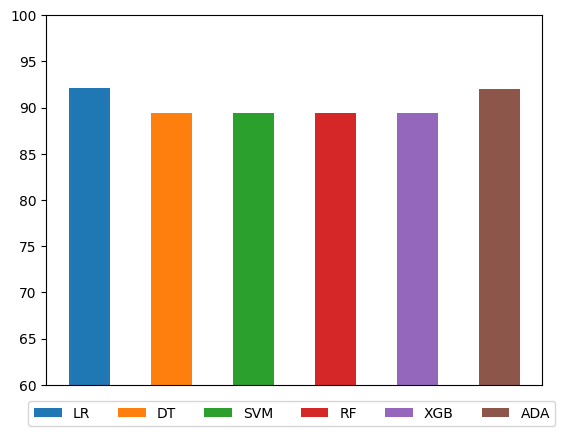

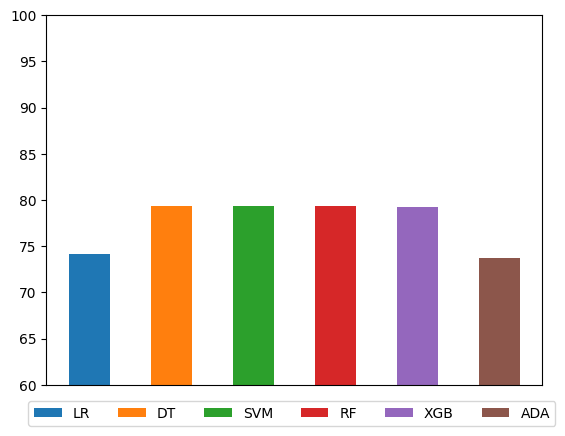

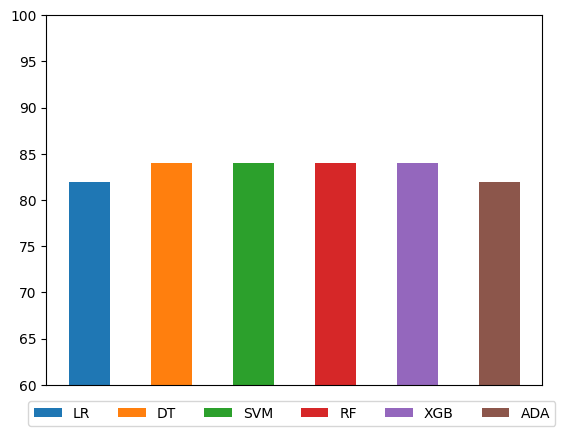

In [107]:
for row in values:
    plt.figure()
    for i,val in enumerate(row):
        plt.bar(i, val, width=0.5, label=list(performance_df.columns)[i])
    plt.ylim(60,100)
    plt.xticks([])
    plt.legend(bbox_to_anchor=[-0.05,-0.13], ncol=len(performance_df.columns),
            loc="lower left")
    plt.show()